In [49]:
import pandas as pd
import numpy as np

In [50]:
data = pd.read_csv('C:/Users/varis/OneDrive/Desktop/Note on lecture/Topic on business analytics/Data for Topic in Business analytics/Aggregate datav3.csv')

In [51]:
data.head()

,Date,Close/Last,FEDFUNDS,Inflation,Real GDP Index,S&P500
0,1/30/2015,$29.29,0.11,-0.10%,18652.507,2063.15
1,2/27/2015,$32.12,0.11,0.00%,18729.566,2115.48
2,3/31/2015,$31.11,0.11,-0.10%,18618.309,2117.39
3,4/30/2015,$31.29,0.12,-0.20%,18784.820,2117.69
4,5/29/2015,$32.57,0.12,0.00%,18749.043,2130.82


In [52]:
data.rename(columns={'Close/Last': 'Close', 'FEDFUNDS' : 'Fedfunds'}, inplace=True)

In [53]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            117 non-null    object 
 1   Close           117 non-null    object 
 2   Fedfunds        117 non-null    float64
 3   Inflation       117 non-null    object 
 4   Real GDP Index  117 non-null    float64
 5   S&P500          117 non-null    float64
dtypes: float64(3), object(3)
memory usage: 5.6+ KB
None


In [54]:
#Change the date to python format
data['Date'] = pd.to_datetime(data['Date'])
data['Date'] = data['Date'].dt.to_period('M').astype(str)

In [55]:
data.head()

,Date,Close,Fedfunds,Inflation,Real GDP Index,S&P500
0,2015-01,$29.29,0.11,-0.10%,18652.507,2063.15
1,2015-02,$32.12,0.11,0.00%,18729.566,2115.48
2,2015-03,$31.11,0.11,-0.10%,18618.309,2117.39
3,2015-04,$31.29,0.12,-0.20%,18784.820,2117.69
4,2015-05,$32.57,0.12,0.00%,18749.043,2130.82


In [56]:
# Delete $ sign
dollar_column = ['Close'] 
for x in dollar_column:
    data[x] = data[x].astype(str).str.replace('$', '', regex=False).astype(float)

In [57]:
# Delete percentage
data['Inflation'] = data['Inflation'].str.replace('%', '').astype(float) / 100

In [58]:
data.head()

,Date,Close,Fedfunds,Inflation,Real GDP Index,S&P500
0,2015-01,29.29,0.11,-0.001,18652.507,2063.15
1,2015-02,32.12,0.11,0.000,18729.566,2115.48
2,2015-03,31.11,0.11,-0.001,18618.309,2117.39
3,2015-04,31.29,0.12,-0.002,18784.820,2117.69
4,2015-05,32.57,0.12,0.000,18749.043,2130.82


In [59]:
print(data.isnull().sum())

Date              0
Close             0
Fedfunds          0
Inflation         0
Real GDP Index    0
S&P500            0
dtype: int64


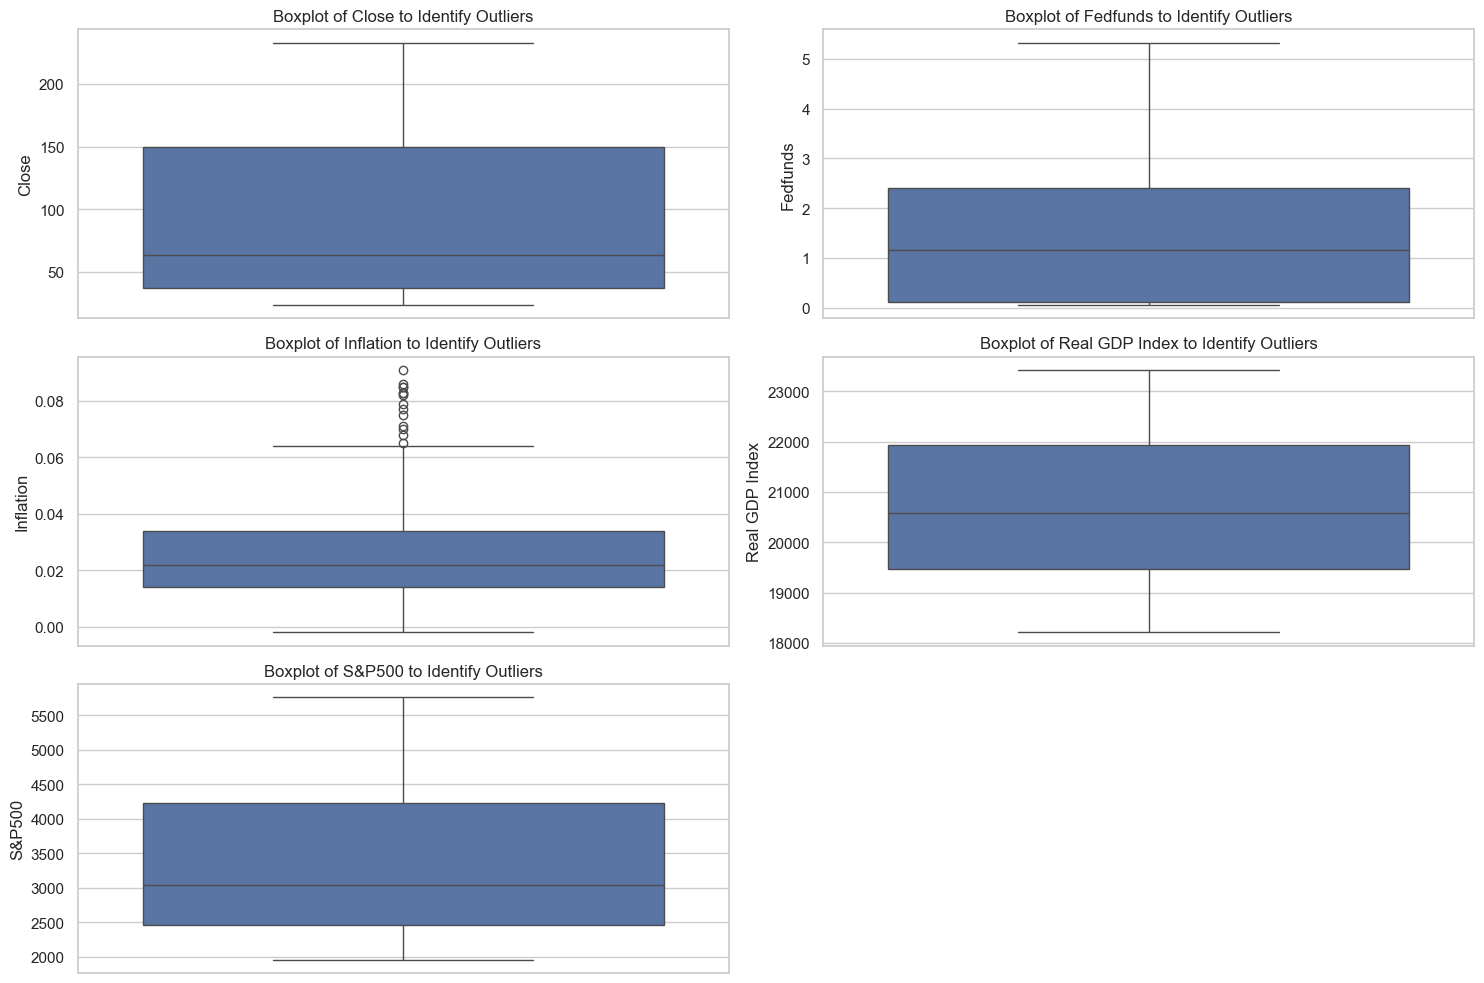

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

variables = ['Close', 'Fedfunds', 'Inflation', 'Real GDP Index', 'S&P500']

plt.figure(figsize=(15, 10))
for i, var in enumerate(variables):
    plt.subplot(3, 2, i+1)
    sns.boxplot(data[var])
    plt.title(f'Boxplot of {var} to Identify Outliers')
plt.tight_layout()
plt.show()

In [61]:
data.describe()

,Close,Fedfunds,Inflation,Real GDP Index,S&P500
count,117.000000,117.00000,117.000000,117.000000,117.000000
mean,93.529573,1.70906,0.028855,20754.348256,3377.571026
std,63.036677,1.83887,0.023196,1429.644276,1049.261076
min,23.440000,0.05000,-0.002000,18205.460000,1951.700000
25%,37.180000,0.12000,0.014000,19465.210000,2453.460000
50%,63.570000,1.15000,0.022000,20572.892000,3044.310000
75%,149.800000,2.40000,0.034000,21936.131000,4232.600000
max,233.000000,5.33000,0.091000,23427.130000,5762.480000


In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

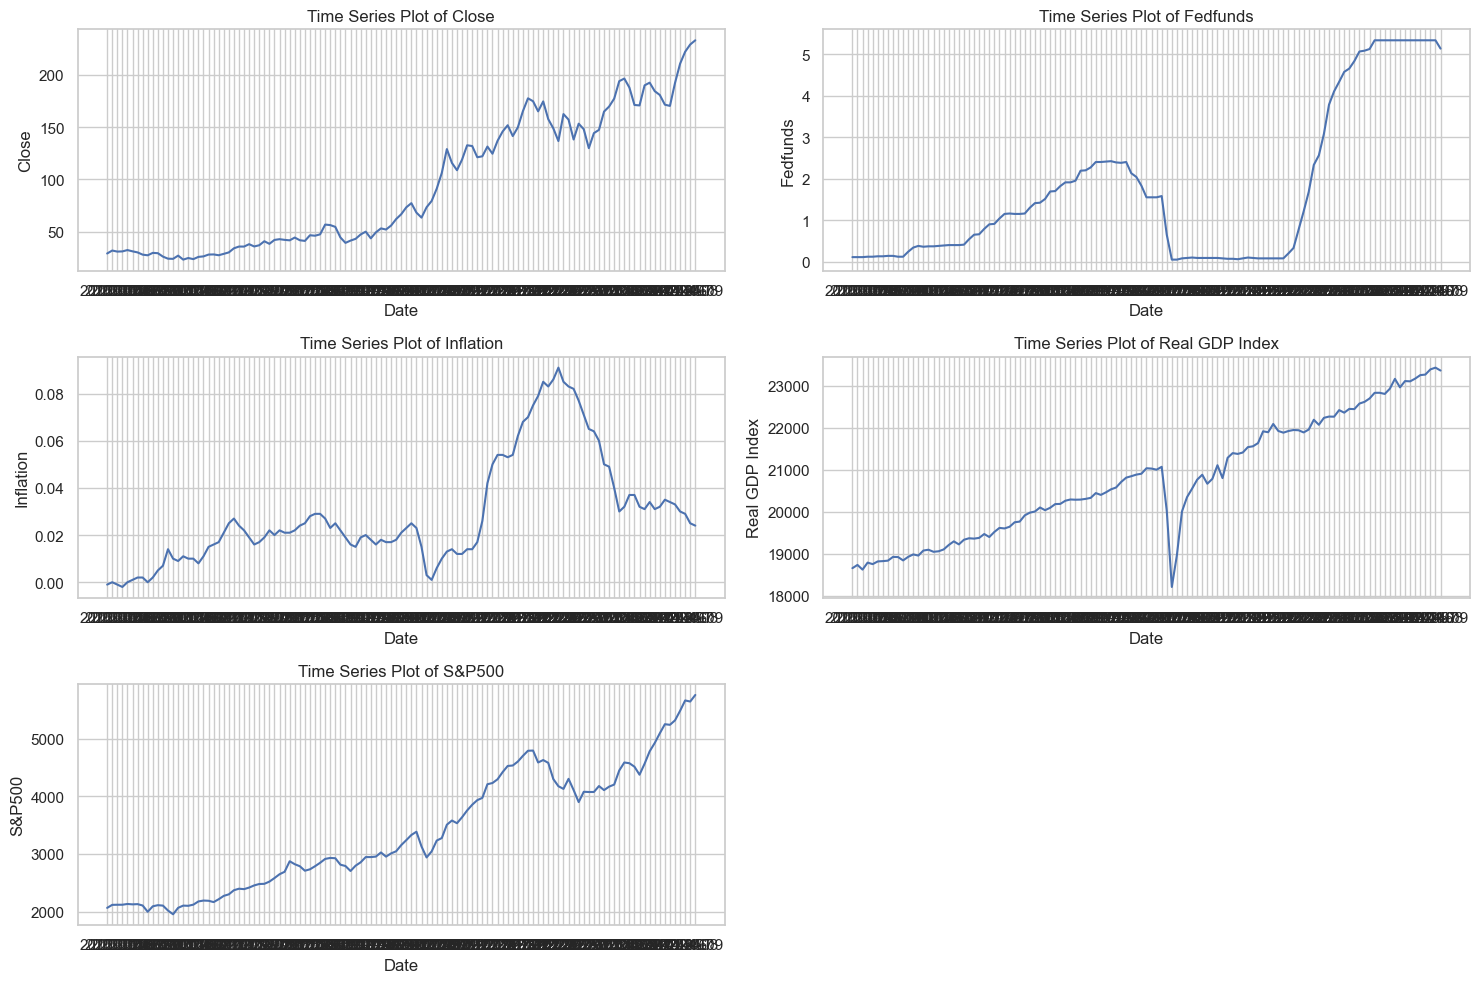

In [63]:

# Define variables for trend analysis
variables = ['Close', 'Fedfunds', 'Inflation', 'Real GDP Index', 'S&P500']

# Plot each variable against Date to understand trends
plt.figure(figsize=(15, 10))
for i, var in enumerate(variables):
    plt.subplot(3, 2, i+1)
    plt.plot(data['Date'], data[var])
    plt.title(f'Time Series Plot of {var}')
    plt.xlabel('Date')
    plt.ylabel(var)

plt.tight_layout()
plt.show()

Correlation Matrix (Pearson):
                   Close  Fedfunds  Inflation  Real GDP Index    S&P500
Close           1.000000  0.587835   0.636544        0.928309  0.972655
Fedfunds        0.587835  1.000000   0.229671        0.740109  0.585659
Inflation       0.636544  0.229671   1.000000        0.665855  0.651491
Real GDP Index  0.928309  0.740109   0.665855        1.000000  0.950144
S&P500          0.972655  0.585659   0.651491        0.950144  1.000000


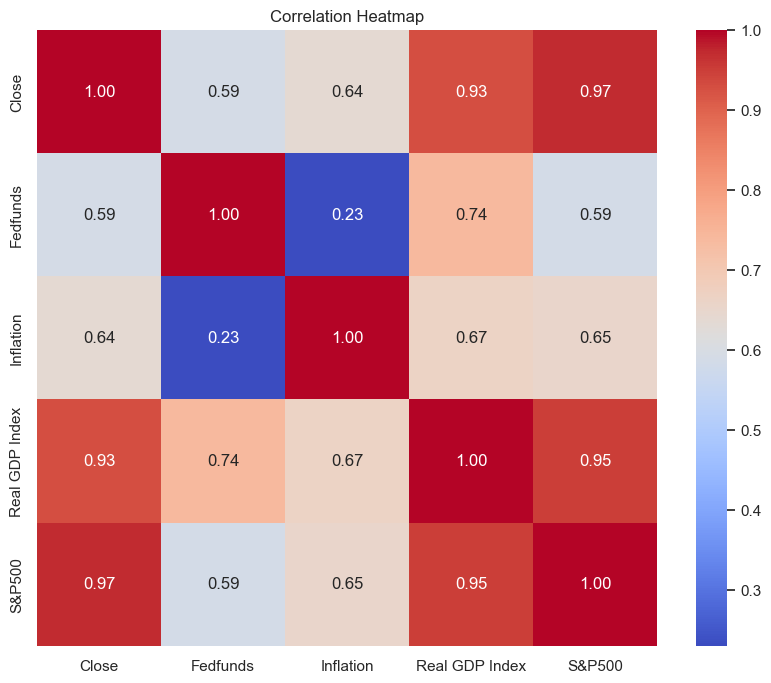

In [64]:
#Correlation analysis
data_testcorr = data.drop(columns=['Date'])
correlation_matrix = data_testcorr.corr(method='pearson')
print("Correlation Matrix (Pearson):")
print(correlation_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

In [65]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [67]:
data = data.dropna()
data.head()

,Date,Close,Fedfunds,Inflation,Real GDP Index,S&P500
0,2015-01,29.29,0.11,-0.001,18652.507,2063.15
1,2015-02,32.12,0.11,0.000,18729.566,2115.48
2,2015-03,31.11,0.11,-0.001,18618.309,2117.39
3,2015-04,31.29,0.12,-0.002,18784.820,2117.69
4,2015-05,32.57,0.12,0.000,18749.043,2130.82


In [68]:
Checkvif = data.drop(columns=['Close', 'Date'])

In [69]:
Checkvif.head()

,Fedfunds,Inflation,Real GDP Index,S&P500
0,0.11,-0.001,18652.507,2063.15
1,0.11,0.000,18729.566,2115.48
2,0.11,-0.001,18618.309,2117.39
3,0.12,-0.002,18784.820,2117.69
4,0.12,0.000,18749.043,2130.82


In [70]:
Checkvif = add_constant(Checkvif)

In [71]:
vif_data = pd.DataFrame()
vif_data["indenpendent"] = Checkvif.columns
vif_data["VIF"] = [variance_inflation_factor(Checkvif.values, i) for i in range(Checkvif.shape[1])]
print(vif_data)

     indenpendent          VIF
0           const  4604.809630
1        Fedfunds     4.863044
2       Inflation     2.727147
3  Real GDP Index    32.116805
4          S&P500    16.506502


In [72]:
#CHECK R2
import statsmodels.api as sm

In [73]:
#Drop variable Real GDP Index to test R2
datadropGDP = data.drop(columns=['Real GDP Index'])
CheckR2 = sm.add_constant(datadropGDP)
X = datadropGDP.drop(columns=['Close', 'Date'])
y = datadropGDP['Close']
model = sm.OLS(y, X).fit()

In [74]:
r_squared = model.rsquared
print(f"R-squared: {r_squared}")

R-squared: 0.9295590633770552


In [75]:
#Drop variable SP500 to test R2
datadropSP500 = data.drop(columns=['S&P500'])
CheckR2 = sm.add_constant(datadropSP500)
y = datadropSP500['Close']
X = datadropSP500.drop(columns=['Close', 'Date'])
model = sm.OLS(y, X).fit()
r_squared = model.rsquared
print(f"R-squared: {r_squared}")

R-squared: 0.8836741998695281


In [76]:
#Recheck multicollinearity
Checkvif_dropGDP = data.drop(columns=['Close', 'Date', 'Real GDP Index'])

In [77]:
vif_data = pd.DataFrame()
vif_data["indenpendent"] = Checkvif_dropGDP.columns
vif_data["VIF"] = [variance_inflation_factor(Checkvif_dropGDP.values, i) for i in range(Checkvif_dropGDP.shape[1])]
print(vif_data)

  indenpendent       VIF
0     Fedfunds  2.572317
1    Inflation  4.058424
2       S&P500  6.110986


In [78]:
Checkvif_dropSP500 = data.drop(columns=['Close', 'Date', 'S&P500'])
vif_data = pd.DataFrame()
vif_data["indenpendent"] = Checkvif_dropSP500.columns
vif_data["VIF"] = [variance_inflation_factor(Checkvif_dropSP500.values, i) for i in range(Checkvif_dropSP500.shape[1])]
print(vif_data)

     indenpendent       VIF
0        Fedfunds  2.104825
1       Inflation  2.930655
2  Real GDP Index  3.587282


In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = data[['Fedfunds', 'Inflation', 'Real GDP Index', 'S&P500']]
features_scaled = scaler.fit_transform(features)
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns)

In [80]:
features_scaled_df.head()

,Fedfunds,Inflation,Real GDP Index,S&P500
0,-0.873329,-1.292617,-1.476508,-1.258099
1,-0.873329,-1.249320,-1.422376,-1.208011
2,-0.873329,-1.292617,-1.500532,-1.206183
3,-0.867867,-1.335914,-1.383561,-1.205896
4,-0.867867,-1.249320,-1.408693,-1.193329


In [81]:
#Run model
datafinal = data.drop(columns=['Real GDP Index'])
y = datafinal['Close']
X = sm.add_constant(datafinal.drop(columns=['Close', 'Date'])) 
model = sm.OLS(y, X).fit()
print(model.summary())
datafinal.head()

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     668.4
Date:                Wed, 04 Dec 2024   Prob (F-statistic):           1.00e-71
Time:                        17:08:09   Log-Likelihood:                -478.87
No. Observations:                 117   AIC:                             965.7
Df Residuals:                     113   BIC:                             976.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -101.2825      5.283    -19.171      0.0

,Date,Close,Fedfunds,Inflation,S&P500
0,2015-01,29.29,0.11,-0.001,2063.15
1,2015-02,32.12,0.11,0.000,2115.48
2,2015-03,31.11,0.11,-0.001,2117.39
3,2015-04,31.29,0.12,-0.002,2117.69
4,2015-05,32.57,0.12,0.000,2130.82


In [82]:
#Run model standardize
datafinal = features_scaled_df.drop(columns=['Real GDP Index'])
y = data['Close']
X = sm.add_constant(datafinal)
model = sm.OLS(y, X).fit()
print(model.summary())
datafinal.head()

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     668.4
Date:                Wed, 04 Dec 2024   Prob (F-statistic):           1.00e-71
Time:                        17:08:10   Log-Likelihood:                -478.87
No. Observations:                 117   AIC:                             965.7
Df Residuals:                     113   BIC:                             976.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         93.5296      1.364     68.582      0.0

,Fedfunds,Inflation,S&P500
0,-0.873329,-1.292617,-1.258099
1,-0.873329,-1.249320,-1.208011
2,-0.873329,-1.292617,-1.206183
3,-0.867867,-1.335914,-1.205896
4,-0.867867,-1.249320,-1.193329


In [83]:
datafinal = features_scaled_df.drop(columns=['S&P500'])
y = data['Close']
X = sm.add_constant(datafinal)
model = sm.OLS(y, X).fit()
print(model.summary())
datafinal.head()

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     296.7
Date:                Wed, 04 Dec 2024   Prob (F-statistic):           2.13e-53
Time:                        17:08:10   Log-Likelihood:                -522.59
No. Observations:                 117   AIC:                             1053.
Df Residuals:                     113   BIC:                             1064.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             93.5296      1.982     47.

,Fedfunds,Inflation,Real GDP Index
0,-0.873329,-1.292617,-1.476508
1,-0.873329,-1.249320,-1.422376
2,-0.873329,-1.292617,-1.500532
3,-0.867867,-1.335914,-1.383561
4,-0.867867,-1.249320,-1.408693


In [84]:
import matplotlib.pyplot as plt

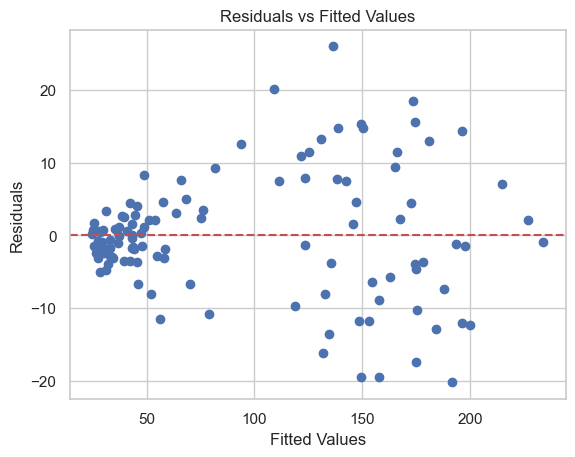

In [85]:
data['Close_lag1'] = data['Close'].shift(1)
data = data.dropna()
y = data['Close']
X = data[['Fedfunds', 'Inflation', 'Real GDP Index', 'Close_lag1']]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     1621.
Date:                Wed, 04 Dec 2024   Prob (F-statistic):           1.96e-97
Time:                        17:08:10   Log-Likelihood:                -407.84
No. Observations:                 116   AIC:                             825.7
Df Residuals:                     111   BIC:                             839.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -92.7387     42.524     -2.

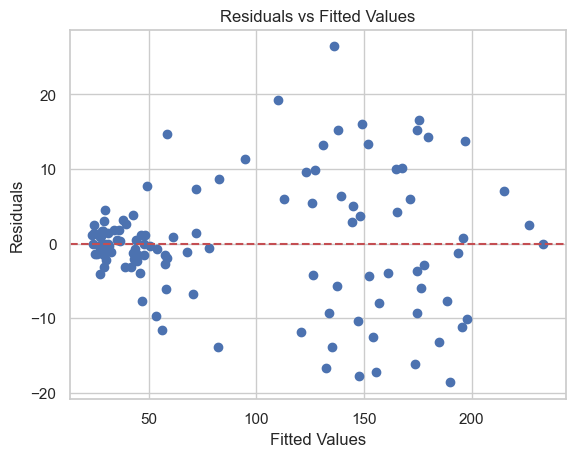

In [86]:
plt.scatter(model.fittedvalues, model.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

In [87]:
data['Close_lag1'] = data['Close'].shift(1)
data = data.dropna()
y = data['Close']
X = data[['Inflation', 'Real GDP Index', 'Close_lag1']]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     2102.
Date:                Wed, 04 Dec 2024   Prob (F-statistic):           1.36e-97
Time:                        17:08:10   Log-Likelihood:                -405.91
No. Observations:                 115   AIC:                             819.8
Df Residuals:                     111   BIC:                             830.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -46.8316     29.003     -1.

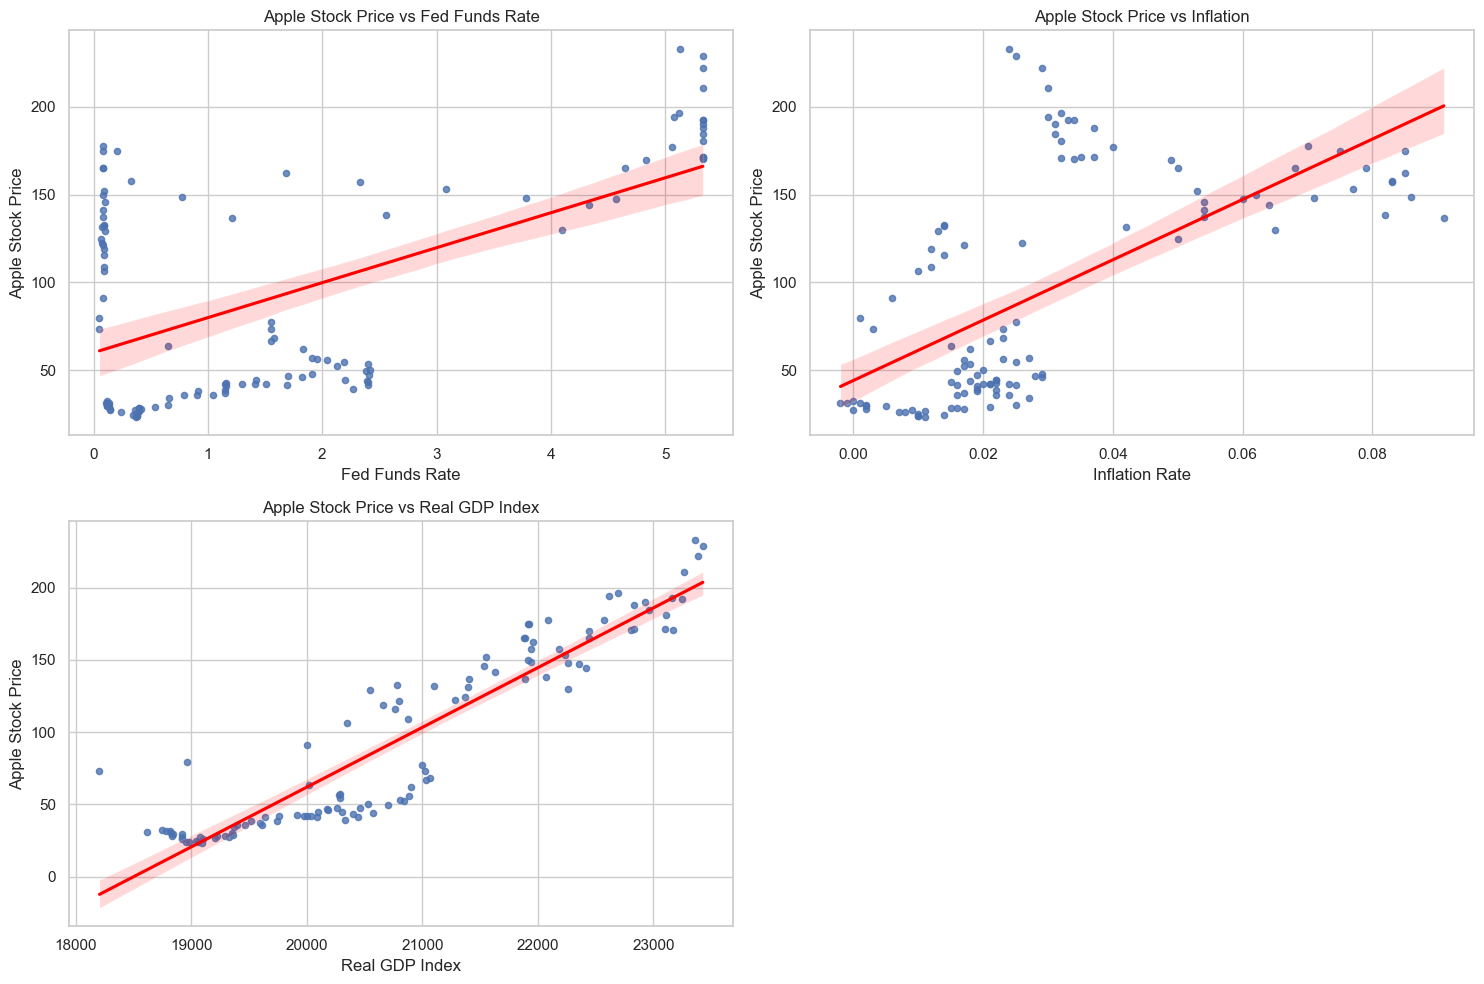

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



# Ensure 'Date' column is in datetime format (if applicable) and other columns are floats
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data['Close'] = data['Close'].astype(float)
data['Fedfunds'] = data['Fedfunds'].astype(float)
data['Inflation'] = data['Inflation'].astype(float)
data['Real GDP Index'] = data['Real GDP Index'].astype(float)

# Set up the size and style of the plots
plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")

# Scatter plot with line of best fit for Fed Funds Rate
plt.subplot(2, 2, 1)
sns.regplot(x='Fedfunds', y='Close', data=data, scatter_kws={"s": 20}, line_kws={"color": "red"})
plt.title('Apple Stock Price vs Fed Funds Rate')
plt.xlabel('Fed Funds Rate')
plt.ylabel('Apple Stock Price')

# Scatter plot with line of best fit for Inflation
plt.subplot(2, 2, 2)
sns.regplot(x='Inflation', y='Close', data=data, scatter_kws={"s": 20}, line_kws={"color": "red"})
plt.title('Apple Stock Price vs Inflation')
plt.xlabel('Inflation Rate')
plt.ylabel('Apple Stock Price')

# Scatter plot with line of best fit for Real GDP Index
plt.subplot(2, 2, 3)
sns.regplot(x='Real GDP Index', y='Close', data=data, scatter_kws={"s": 20}, line_kws={"color": "red"})
plt.title('Apple Stock Price vs Real GDP Index')
plt.xlabel('Real GDP Index')
plt.ylabel('Apple Stock Price')

# Layout adjustment
plt.tight_layout()
plt.show()



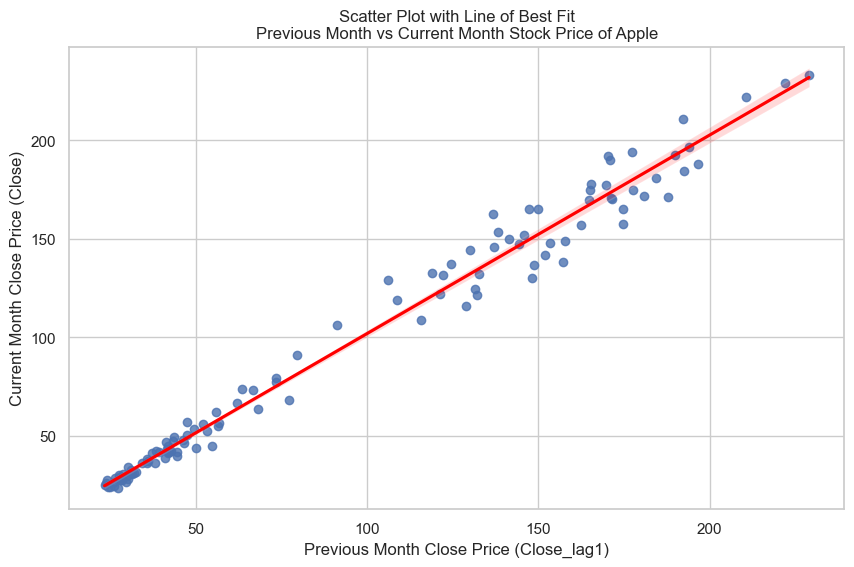

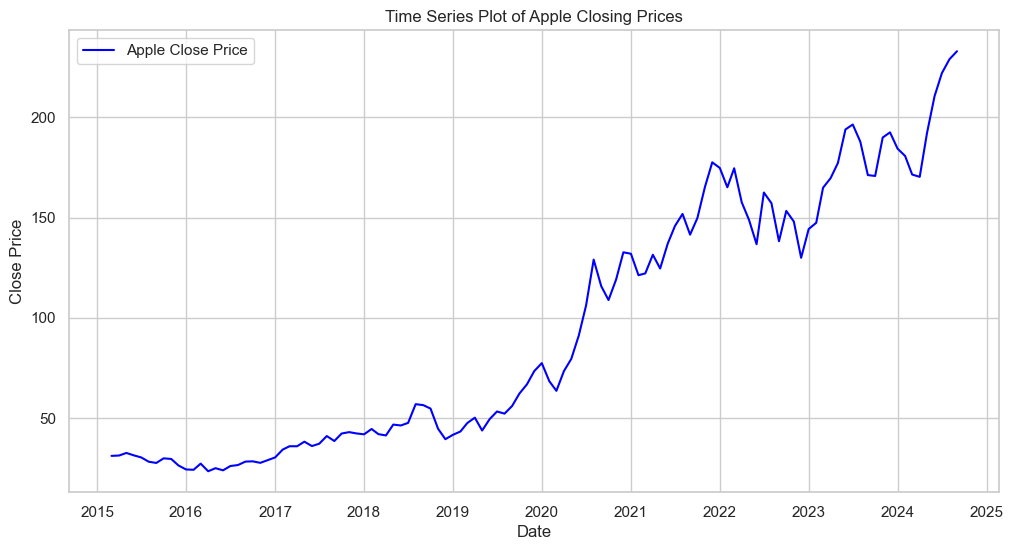

In [89]:

# Set seaborn style for better aesthetics
sns.set(style="whitegrid")

# Scatter Plot with Line of Best Fit: Previous Month (Close_lag1) vs Current Month (Close)
plt.figure(figsize=(10, 6))
sns.regplot(x='Close_lag1', y='Close', data=data, line_kws={"color": "red"})
plt.xlabel('Previous Month Close Price (Close_lag1)')
plt.ylabel('Current Month Close Price (Close)')
plt.title('Scatter Plot with Line of Best Fit\nPrevious Month vs Current Month Stock Price of Apple')
plt.show()

# Time Series Plot: Historical Closing Price
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values(by='Date')  # Ensure data is sorted by date

plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Apple Close Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Time Series Plot of Apple Closing Prices')
plt.legend()
plt.show()

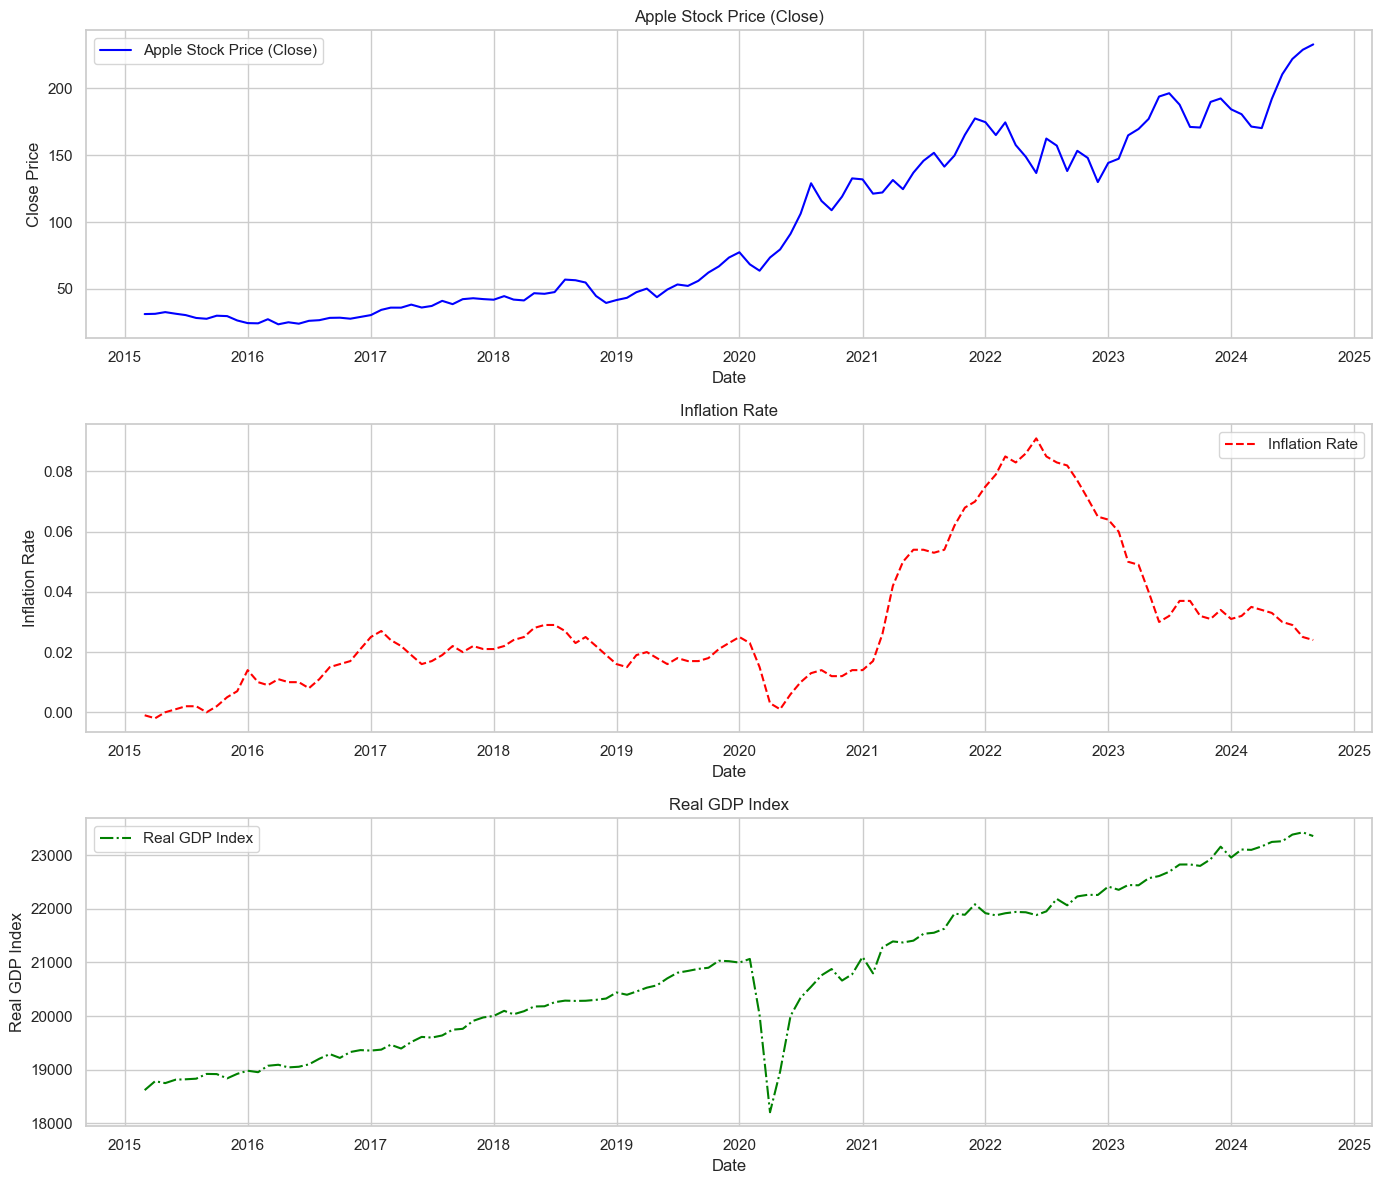

In [90]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 12))

# Plot Apple Stock Price (Close)
plt.subplot(3, 1, 1)
plt.plot(data['Date'], data['Close'], color='blue', label='Apple Stock Price (Close)')
plt.title('Apple Stock Price (Close)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()

# Plot Inflation Rate
plt.subplot(3, 1, 2)
plt.plot(data['Date'], data['Inflation'], color='red', linestyle='--', label='Inflation Rate')
plt.title('Inflation Rate')
plt.xlabel('Date')
plt.ylabel('Inflation Rate')
plt.legend()

# Plot Real GDP Index
plt.subplot(3, 1, 3)
plt.plot(data['Date'], data['Real GDP Index'], color='green', linestyle='-.', label='Real GDP Index')
plt.title('Real GDP Index')
plt.xlabel('Date')
plt.ylabel('Real GDP Index')
plt.legend()

plt.tight_layout()
plt.show()


In [91]:
#Run model
datafinal2 = data.drop(columns=['Real GDP Index', 'S&P500'])
y = datafinal2['Close']
X = sm.add_constant(datafinal2.drop(columns=['Close', 'Date'])) 
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     2051.
Date:                Wed, 04 Dec 2024   Prob (F-statistic):           5.18e-97
Time:                        17:08:12   Log-Likelihood:                -407.29
No. Observations:                 115   AIC:                             822.6
Df Residuals:                     111   BIC:                             833.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2859      1.477      0.871      0.3

In [92]:
residuals = y_train - model.predict(X)
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.show()

NameError: name 'y_train' is not defined

In [ ]:
datafinal2.head()

In [97]:
print(data['Close_lag1'])

2       32.12
3       31.11
4       31.29
5       32.57
6       31.36
        ...  
112    170.33
113    192.25
114    210.62
115    222.08
116    229.00
Name: Close_lag1, Length: 115, dtype: float64
